# Investigación 1
# Andrés Vargas Guevara

# JRC Geothermal Power Plant Dataset 

En esta investigación se muestran los pasos que considero apropiados para realizar un pre-procesado de los datos asociados al dataset "JRC Geothermal Power Plant Dataset", el cual se puede obtener en este sitio:

https://data.europa.eu/euodp/data/dataset/jrc-10128-10001

Descripción: "Dataset of worldwide geothermal power plants including technological details"

Se elige dicho dataset debido a que, a diferencia de muchos datasets presentes en https://data.europa.eu/euodp/data/dataset, este no cuenta con un trabajo previo de análisis y visualización.
Se considera que es un dataset de dificultad moderada debido a que hay datos faltantes, datos redundantes, columnas con outliers verdaderos que permiten aplicar la mediana, columnas sin outliers para utilizar la media y columnas que requieren ser codificadas, lo que hace que el pre-procesado no sea trivial.

Primero se procede a cargar las librerías necesarias:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

Se carga el archivo con los datos:

In [2]:
power_plants = pd.read_csv("JRC-GEOPP-DB.csv")

Se visualizan las primeras líneas:

In [3]:
power_plants.head()

,id_powerplant,name_powerplant,gross_cap_ele,ini_cap_ele,gross_cap_th,name_status,name_technology,name_subtechnology,start_year,latitude,...,min_temp,max_temp,min_flow_rate,max_flow_rate,no_units,name_geothermal_area,name_turbine_type,turbine_man,name_owner,name_operator
0,1,Gunung Salak I,60.0,60.0,0.0,in operation,Geothermal energy,Geothermal power,1994,-6.7403,...,240.0,310.0,NaN,NaN,10.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
1,2,Gunung Salak II,60.0,60.0,0.0,in operation,Geothermal energy,Geothermal power,1994,-6.7403,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
2,3,Gunung Salak III,60.0,60.0,0.0,in operation,Geothermal energy,Geothermal power,1997,-6.7403,...,240.0,310.0,NaN,NaN,3.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
3,4,Gunung Salak IV,65.0,65.0,NaN,in operation,Geothermal energy,Geothermal power,1997,-6.7417,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Fuji Electric Co. Ltd.,Chevron Geothermal Salak,Chevron Geothermal Salak
4,5,Gunung Salak V,65.0,65.0,NaN,in operation,Geothermal energy,Geothermal power,2002,-6.7417,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Fuji Electric Co. Ltd.,Chevron Geothermal Salak,Chevron Geothermal Salak


Antes de editar el dataset, se procede a capturar, en una lista, los nombres de las columnas.

In [4]:
column_names = list(power_plants.columns)
print(column_names)

['id_powerplant', 'name_powerplant', 'gross_cap_ele', 'ini_cap_ele', 'gross_cap_th', 'name_status', 'name_technology', 'name_subtechnology', 'start_year', 'latitude', 'longitude', 'exact_coordinates', 'name_region_L2', 'NUTS2_code', 'name_region_L1', 'NUTS1_code', 'name_country', 'name_continent', 'max_well_depth', 'min_temp', 'max_temp', 'min_flow_rate', 'max_flow_rate', 'no_units', 'name_geothermal_area', 'name_turbine_type', 'turbine_man', 'name_owner', 'name_operator']


Identifico el siguiente inconveniente: hay columnas que no proveen datos diferenciadores (e.g. todas las plantas en el dataset están operando, por lo que la columna "name_status" no aporta un dato útil).
Se procede a eliminar las columnas que no aportan información útil.

Eliminar las columnas "name_status", "name_technology" y "name_subtechnology".

In [5]:
del power_plants["name_status"]
del power_plants["name_technology"]
del power_plants["name_subtechnology"]

Corroborar que las columnas fueron eliminadas.

In [6]:
power_plants.head()

,id_powerplant,name_powerplant,gross_cap_ele,ini_cap_ele,gross_cap_th,start_year,latitude,longitude,exact_coordinates,name_region_L2,...,min_temp,max_temp,min_flow_rate,max_flow_rate,no_units,name_geothermal_area,name_turbine_type,turbine_man,name_owner,name_operator
0,1,Gunung Salak I,60.0,60.0,0.0,1994,-6.7403,106.673,1,NaN,...,240.0,310.0,NaN,NaN,10.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
1,2,Gunung Salak II,60.0,60.0,0.0,1994,-6.7403,106.673,1,NaN,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
2,3,Gunung Salak III,60.0,60.0,0.0,1997,-6.7403,106.673,1,NaN,...,240.0,310.0,NaN,NaN,3.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
3,4,Gunung Salak IV,65.0,65.0,NaN,1997,-6.7417,106.647,1,NaN,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Fuji Electric Co. Ltd.,Chevron Geothermal Salak,Chevron Geothermal Salak
4,5,Gunung Salak V,65.0,65.0,NaN,2002,-6.7417,106.647,1,NaN,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Fuji Electric Co. Ltd.,Chevron Geothermal Salak,Chevron Geothermal Salak


Identifico el siguiente inconveniente: hay columnas que tienen datos faltantes y que son strings (e.g. el nombre de la región no aparece en algunos casos, por lo que la columna "name_region_L2" no se puede averiguar. Además hay información más completa de la ubicación en otras columnas).
Se procede a eliminar las columnas que no aportan información útil.

Eliminar las columnas "name_region_L2", "NUTS2_code", "name_region_L1", "NUTS1_code".

In [7]:
del power_plants["name_region_L2"]
del power_plants["NUTS2_code"]
del power_plants["name_region_L1"]
del power_plants["NUTS1_code"]

Corroborar que las columnas fueron eliminadas.

In [8]:
power_plants.head()

,id_powerplant,name_powerplant,gross_cap_ele,ini_cap_ele,gross_cap_th,start_year,latitude,longitude,exact_coordinates,name_country,...,min_temp,max_temp,min_flow_rate,max_flow_rate,no_units,name_geothermal_area,name_turbine_type,turbine_man,name_owner,name_operator
0,1,Gunung Salak I,60.0,60.0,0.0,1994,-6.7403,106.673,1,Indonesia,...,240.0,310.0,NaN,NaN,10.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
1,2,Gunung Salak II,60.0,60.0,0.0,1994,-6.7403,106.673,1,Indonesia,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
2,3,Gunung Salak III,60.0,60.0,0.0,1997,-6.7403,106.673,1,Indonesia,...,240.0,310.0,NaN,NaN,3.0,Gunun-Salak,Single flash,Ansaldo Energia S.p.A.,PLN,PLN
3,4,Gunung Salak IV,65.0,65.0,NaN,1997,-6.7417,106.647,1,Indonesia,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Fuji Electric Co. Ltd.,Chevron Geothermal Salak,Chevron Geothermal Salak
4,5,Gunung Salak V,65.0,65.0,NaN,2002,-6.7417,106.647,1,Indonesia,...,240.0,310.0,NaN,NaN,1.0,Gunun-Salak,Single flash,Fuji Electric Co. Ltd.,Chevron Geothermal Salak,Chevron Geothermal Salak


Identifico el siguiente inconveniente: hay columnas que tienen datos faltantes y que son integers (e.g. el valor de temperatura mínimo reportado, por lo que los valores faltantes de la columna "min_temp" se sustituyen por la mediana. Se toma esta decisión basado en el hecho de que hay un outlier, 80, que es verdadero y no se puede prescindir de él).
Se procede a reemplazar el valor NaN en las columnas con la mediana correspondiente.

In [9]:
power_plants["min_temp"].fillna((power_plants["min_temp"].median()), inplace = True)
power_plants["max_temp"].fillna((power_plants["max_temp"].median()), inplace = True)
power_plants["min_flow_rate"].fillna((power_plants["min_flow_rate"].median()), inplace = True)
power_plants["max_flow_rate"].fillna((power_plants["max_flow_rate"].median()), inplace = True)

Corroborar que las columnas anteriores ahora tienen el valor de la mediana en vez de NaN.

In [10]:
print(power_plants["min_temp"])

0      240.0
1      240.0
2      240.0
3      240.0
4      240.0
       ...  
361    185.0
362    185.0
363    185.0
364    185.0
365    185.0
Name: min_temp, Length: 366, dtype: float64


In [11]:
print(power_plants["max_temp"])

0      310.0
1      310.0
2      310.0
3      310.0
4      310.0
       ...  
361    185.0
362    185.0
363    185.0
364    185.0
365    185.0
Name: max_temp, Length: 366, dtype: float64


In [12]:
print(power_plants["min_flow_rate"])

0      150.0
1      150.0
2      150.0
3      150.0
4      150.0
       ...  
361    150.0
362    150.0
363    150.0
364    150.0
365    150.0
Name: min_flow_rate, Length: 366, dtype: float64


In [13]:
print(power_plants["max_flow_rate"])

0      150.0
1      150.0
2      150.0
3      150.0
4      150.0
       ...  
361    150.0
362    150.0
363    150.0
364    150.0
365    150.0
Name: max_flow_rate, Length: 366, dtype: float64


Identifico el siguiente inconveniente: hay una gran cantidad de columnas que tienen strings en vez de integers o floats (e.g. "name_country" y "turbine_man"), lo que dificulta la subsecuente aplicación de un algoritmo de reconocimiento de patrones. Por esto, propongo una simplificación del dataset y posterior encoding de ciertas columnas.

Para esto se parte del siguiente supuesto: el dataset se desea utilizar para predecir el "gross electrical capacity" (columna "gross_cap_ele") dependiendo de la capacidad eléctrica inicial, el año en que empezó a funcionar la planta, el continente en que se ubica, las temperaturas mínimas y máximas de operación, flujo mínimo y máximo, la cantidad de unidades y tipo de turbina. Considero que estas son las variables más relevantes del dataset.

Procedo a eliminar todas las columnas con datos redundantes de ubicación, las columnas que tienen datos insuficientes, y aquellas columnas con datos que considero irrelevantes para hacer la predicción planteada.

In [14]:
del power_plants["name_powerplant"]
del power_plants["gross_cap_th"]
del power_plants["latitude"]
del power_plants["longitude"]
del power_plants["exact_coordinates"]
del power_plants["name_country"]
del power_plants["max_well_depth"]
del power_plants["name_geothermal_area"]
del power_plants["turbine_man"]
del power_plants["name_owner"]
del power_plants["name_operator"]

Corroborar que las columnas fueron eliminadas.

In [15]:
power_plants.head()

,id_powerplant,gross_cap_ele,ini_cap_ele,start_year,name_continent,min_temp,max_temp,min_flow_rate,max_flow_rate,no_units,name_turbine_type
0,1,60.0,60.0,1994,Asia,240.0,310.0,150.0,150.0,10.0,Single flash
1,2,60.0,60.0,1994,Asia,240.0,310.0,150.0,150.0,1.0,Single flash
2,3,60.0,60.0,1997,Asia,240.0,310.0,150.0,150.0,3.0,Single flash
3,4,65.0,65.0,1997,Asia,240.0,310.0,150.0,150.0,1.0,Single flash
4,5,65.0,65.0,2002,Asia,240.0,310.0,150.0,150.0,1.0,Single flash


Ahora lo que procede es realizar la codificación de los valores de las dos columnas que están pobladas con strings.
Para la columna "name_continent" se define la siguiente codificación:
Asia=1, Europe=2, Oceania=3, Africa=4, North America=5, South America=6

In [16]:
power_plants["name_continent"].replace(to_replace='Asia', value = 1, inplace = True)
power_plants["name_continent"].replace(to_replace='Europe', value = 2, inplace = True)
power_plants["name_continent"].replace(to_replace='Oceania', value = 3, inplace = True)
power_plants["name_continent"].replace(to_replace='Africa', value = 4, inplace = True)
power_plants["name_continent"].replace(to_replace='North America', value = 5, inplace = True)
power_plants["name_continent"].replace(to_replace='South America', value = 6, inplace = True)

Corroborar que la columna fue codificada.

In [17]:
print(power_plants["name_continent"])

0      1
1      1
2      1
3      1
4      1
      ..
361    5
362    5
363    5
364    5
365    5
Name: name_continent, Length: 366, dtype: int64


Se realiza un procedimiento homólogo para la columna "name_turbine_type" se define la siguiente codificación:
Single flash=1, Dry steam=2, ORC=3, Double flash=4, Kalina=5, Hybrid=6, Back pressure=7, Triple flash=8, unknown=9

In [18]:
power_plants["name_turbine_type"].replace(to_replace='Single flash', value = 1, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='Dry steam', value = 2, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='ORC', value = 3, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='Double flash', value = 4, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='Kalina', value = 5, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='Hybrid', value = 6, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='Back pressure', value = 7, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='Triple flash', value = 8, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='unknown', value = 9, inplace = True)
power_plants["name_turbine_type"].replace(to_replace='Other', value = 10, inplace = True)

Corroborar que la columna fue codificada.

In [19]:
print(power_plants["name_turbine_type"])

0      1
1      1
2      1
3      1
4      1
      ..
361    3
362    3
363    3
364    3
365    3
Name: name_turbine_type, Length: 366, dtype: int64


Por último, noto que hay valores faltantes en la columna asociada a la cantidad de unidades. Para esto, reemplazo los valores faltantes con la media de la columna, ya que esta columna no presenta outliers verdaderos. Luego, realizo un redondeo para que el valor sea un número entero.

In [20]:
power_plants["no_units"].fillna((power_plants["no_units"].mean()), inplace = True)
power_plants["no_units"] = power_plants["no_units"].round()

Corroborar que la columna anterior ahora tiene el valor redondeado de la media en vez de NaN.

In [21]:
print(power_plants["no_units"])

0      10.0
1       1.0
2       3.0
3       1.0
4       1.0
       ... 
361     2.0
362     2.0
363     2.0
364     2.0
365     1.0
Name: no_units, Length: 366, dtype: float64


El siguiente es el producto final del pre-procesado propuesto:

In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(power_plants)

     id_powerplant  gross_cap_ele  ini_cap_ele  start_year  name_continent  \
0                1         60.000       60.000        1994               1   
1                2         60.000       60.000        1994               1   
2                3         60.000       60.000        1997               1   
3                4         65.000       65.000        1997               1   
4                5         65.000       65.000        2002               1   
5                6         65.000       65.000        2002               1   
6                7        110.000      110.000        1999               1   
7                8        117.000      117.000        1999               1   
8                9         30.000       30.000        1983               1   
9               10         55.000       55.000        1987               1   
10              11         55.000       55.000        1987               1   
11              12         63.000       63.000        2008      

Finalmente, se presentan un par de gráficos que permiten visualizar mejor el dataset:

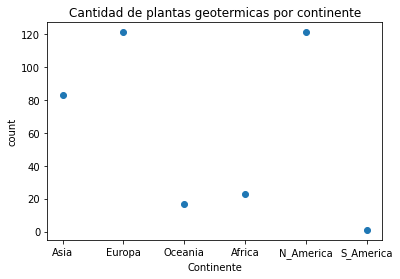

In [23]:
# Cantidad de plantas geotérmicas por continente
# Este gráfico permite visualizar un dato que no se encuentra en el dataset, la suma de todas las plantas
# geotérmicas que hay en cada continente. Por ejemplo, existen 120 plantas geotérmicas en Europa.
plt.figure()
plot=power_plants['name_continent'].value_counts().plot(title='Cantidad de plantas geotermicas por continente',
                                                   style='o')
plt.xticks([1,2,3,4,5,6], ['Asia', 'Europa', 'Oceania', 'Africa', 'N_America', 'S_America'])
plot.set(xlabel='Continente', ylabel='count')
plt.show()

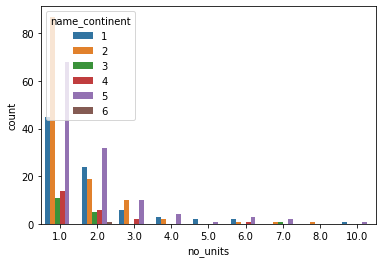

In [24]:
# Cantidad de turbinas por planta geotérmica, por continente
# Este gráfico permite visualizar cuántas turbinas hay instaladas en cada planta geotérmica, esto dividido por
# continente. Por ejemplo, en Asia y Norte América, hay una planta geotérmica que cuenta con 10 turbinas. 
# Mientras que no existen plantas geotérmicas con esta cantidad de turbinas en el resto de los continentes.
plt.figure()
sns.countplot(x='no_units', hue='name_continent', data=power_plants)
plt.show()